# Problem Statement:

##### Using a dataset that contains information like quality Gender, Chain_smoker, Consumes_other_tobacco_products, HighBP, Obese, Diabetes, Metabolic_syndrome to form Clusters

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part-2 Data Exploration and Preprocessing

#### 1 - Loading the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Vyas\1_Assignment\ML FT Projects\Unsupervised\Clustering\P11_Cardiac_Arrest_Analysis\Python_Clustering_Pr.csv")
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


#### 2 - Checking the null values

In [3]:
df.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

#### 3 - Checking information about dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    int64 
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

#### 4 - Describing the dataset in statistic form

In [5]:
df.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 5 - Droping under risk column

In [6]:
df.drop('UnderRisk',axis=1,inplace=True)
df.head(2)

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
0,1,1,1,0,1,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0


## Part - 2 Working with the Model

#### 1 - Applying Kmean clustering on the dataset

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [8]:
km = KMeans(n_clusters=2)
kmean = km.fit_predict(df)

In [9]:
print(kmean)

[0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 0 0 1 0 0 1 

#### 4 - Printing Cluster Centers

In [10]:
km.cluster_centers_

array([[9.58925750e-01, 1.43759874e-01, 8.10426540e-01, 9.63665087e-02,
        9.14691943e-01, 6.63507109e-02, 5.21327014e-02, 8.53080569e-02,
        9.19431280e-01, 2.52764613e-02, 2.68562401e-02, 3.00157978e-02],
       [2.00000000e+00, 6.25000000e-02, 9.06250000e-01, 6.25000000e-02,
        9.29687500e-01, 2.73437500e-02, 1.95312500e-02, 7.42187500e-02,
        9.41406250e-01, 1.04083409e-17, 7.81250000e-03, 3.90625000e-02]])

#### 3 - Creating column cluster for predicted label value

In [11]:
df_1 = df.copy()
df_1 = pd.DataFrame(df_1)
df_1.head(2)

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
0,1,1,1,0,1,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0


In [12]:
df_1['Predicted_Labels'] = kmean
df_1.head(10)

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,Predicted_Labels
0,1,1,1,0,1,0,0,0,1,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0,0
3,1,0,1,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0,0
5,2,0,1,0,1,0,0,0,1,0,0,0,1
6,1,0,1,0,0,0,0,1,1,0,0,0,0
7,2,0,1,0,1,0,0,0,1,0,0,0,1
8,1,0,1,0,1,0,0,0,1,0,0,0,0
9,1,0,1,0,0,0,0,1,1,0,0,0,0


#### 4 - Plotting the hierarchical clustering using scipy

In [13]:
df_2 = df_1.copy()
df_2 = pd.DataFrame(df_1)

In [14]:
import scipy.cluster.hierarchy as sch

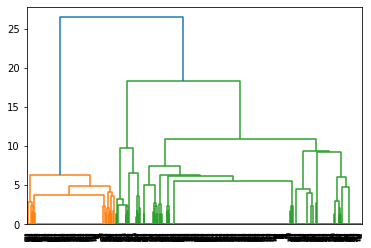

In [15]:
dendrogram = sch.dendrogram(sch.linkage(df_2,method='ward'))

#### 5 - Applying Agglomerative Clustering using number of clusters

In [24]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(df_2)

#### 6 - Create Label Column for predicted cluster label

In [25]:
df_2['Predicted_Label'] = cluster
df_2.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,Predicted_Labels,Predicted_Label
0,1,1,1,0,1,0,0,0,1,0,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0,0,2
2,1,0,1,0,1,0,0,0,1,0,0,0,0,2
3,1,0,1,0,1,0,0,0,1,0,0,0,0,2
4,1,0,0,0,0,0,1,1,0,0,0,0,0,5


#### 7 - Showing label counts

In [26]:
df_2['Predicted_Label'].value_counts()

2    362
3    237
0    145
4     73
1     40
5     32
Name: Predicted_Label, dtype: int64

#### 8 - Showing the silhouette score

In [27]:
score = silhouette_score(df_2,cluster)
score

0.7188230231737076